Epoch 1/100
2441/2441 - 22s - loss: 0.0134 - 22s/epoch - 9ms/step
Epoch 2/100
2441/2441 - 10s - loss: 0.0101 - 10s/epoch - 4ms/step
Epoch 3/100
2441/2441 - 4s - loss: 0.0100 - 4s/epoch - 2ms/step
Epoch 4/100
2441/2441 - 6s - loss: 0.0099 - 6s/epoch - 2ms/step
Epoch 5/100
2441/2441 - 5s - loss: 0.0099 - 5s/epoch - 2ms/step
Epoch 6/100
2441/2441 - 5s - loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 7/100
2441/2441 - 6s - loss: 0.0097 - 6s/epoch - 2ms/step
Epoch 8/100
2441/2441 - 5s - loss: 0.0099 - 5s/epoch - 2ms/step
Epoch 9/100
2441/2441 - 6s - loss: 0.0098 - 6s/epoch - 2ms/step
Epoch 10/100
2441/2441 - 5s - loss: 0.0097 - 5s/epoch - 2ms/step
Epoch 11/100
2441/2441 - 6s - loss: 0.0099 - 6s/epoch - 2ms/step
Epoch 12/100
2441/2441 - 5s - loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 13/100
2441/2441 - 5s - loss: 0.0097 - 5s/epoch - 2ms/step
Epoch 14/100
2441/2441 - 6s - loss: 0.0098 - 6s/epoch - 2ms/step
Epoch 15/100
2441/2441 - 5s - loss: 0.0098 - 5s/epoch - 2ms/step
Epoch 16/100
2441/2441 - 6s - 

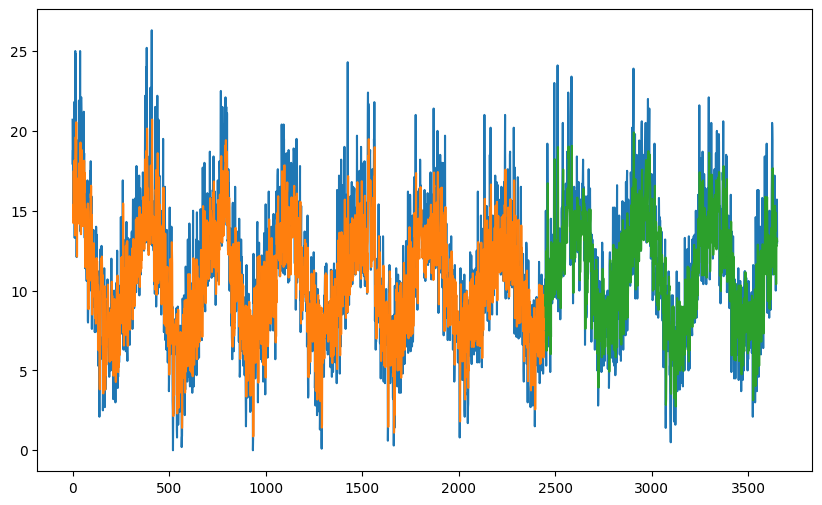

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values.astype('float32')

# Step 2: Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 4: Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Step 5: Evaluate the model
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate error scores
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print(f'Train Score: {trainScore:.2f} MAE')
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print(f'Test Score: {testScore:.2f} MAE')

# RMSE can be calculated similarly using mean_squared_error with squared=False

# Plotting baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(np.concatenate([np.empty((look_back+1))*np.nan, trainPredict[:,0]]))
plt.plot(np.concatenate([np.empty((len(train)+look_back+1))*np.nan, testPredict[:,0]]))
plt.show()